#**Exploratory Data Analysis**

In [ ]:
#Sample size after cleaning data
total_rows = df_cleaned.shape[0]
print("New Sample size in df_cleaned:", total_rows)

# Count number of individuals with BMI >= 30 after cleaning data
obese_count = df_cleaned[df_cleaned["BMI"] >= 30].shape[0]

# Print the result
print("Number of Obese individuals (BMI ≥ 30) :", obese_count)


New Sample size in df_cleaned: 2109
Number of Obese individuals (BMI ≥ 30) : 972


In [ ]:
#Information about the variables after cleaning the datatset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109 entries, 0 to 2110
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family_ob_hist          2109 non-null   int64  
 1   freq_high_cal_food      2109 non-null   int64  
 2   phy_act_freq            2109 non-null   float64
 3   consumption_of_alcohol  2109 non-null   int64  
 4   BMI                     2109 non-null   float64
 5   Obesity                 2109 non-null   bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 100.9 KB


In [ ]:
#View the basic statistics of the numeric columns in the cleaned dataset
numeric_data = df_cleaned[[ "BMI", "consumption_of_alcohol", "phy_act_freq"]]

# Display summary statistics
print(numeric_data.describe())


               BMI  consumption_of_alcohol  phy_act_freq
count  2109.000000             2109.000000   2109.000000
mean     29.689748                0.731152      1.009833
std       8.003411                0.515676      0.850723
min      12.998685                0.000000      0.000000
25%      24.314124                0.000000      0.121585
50%      28.716393                1.000000      1.000000
75%      36.013239                1.000000      1.666390
max      50.811753                3.000000      3.000000


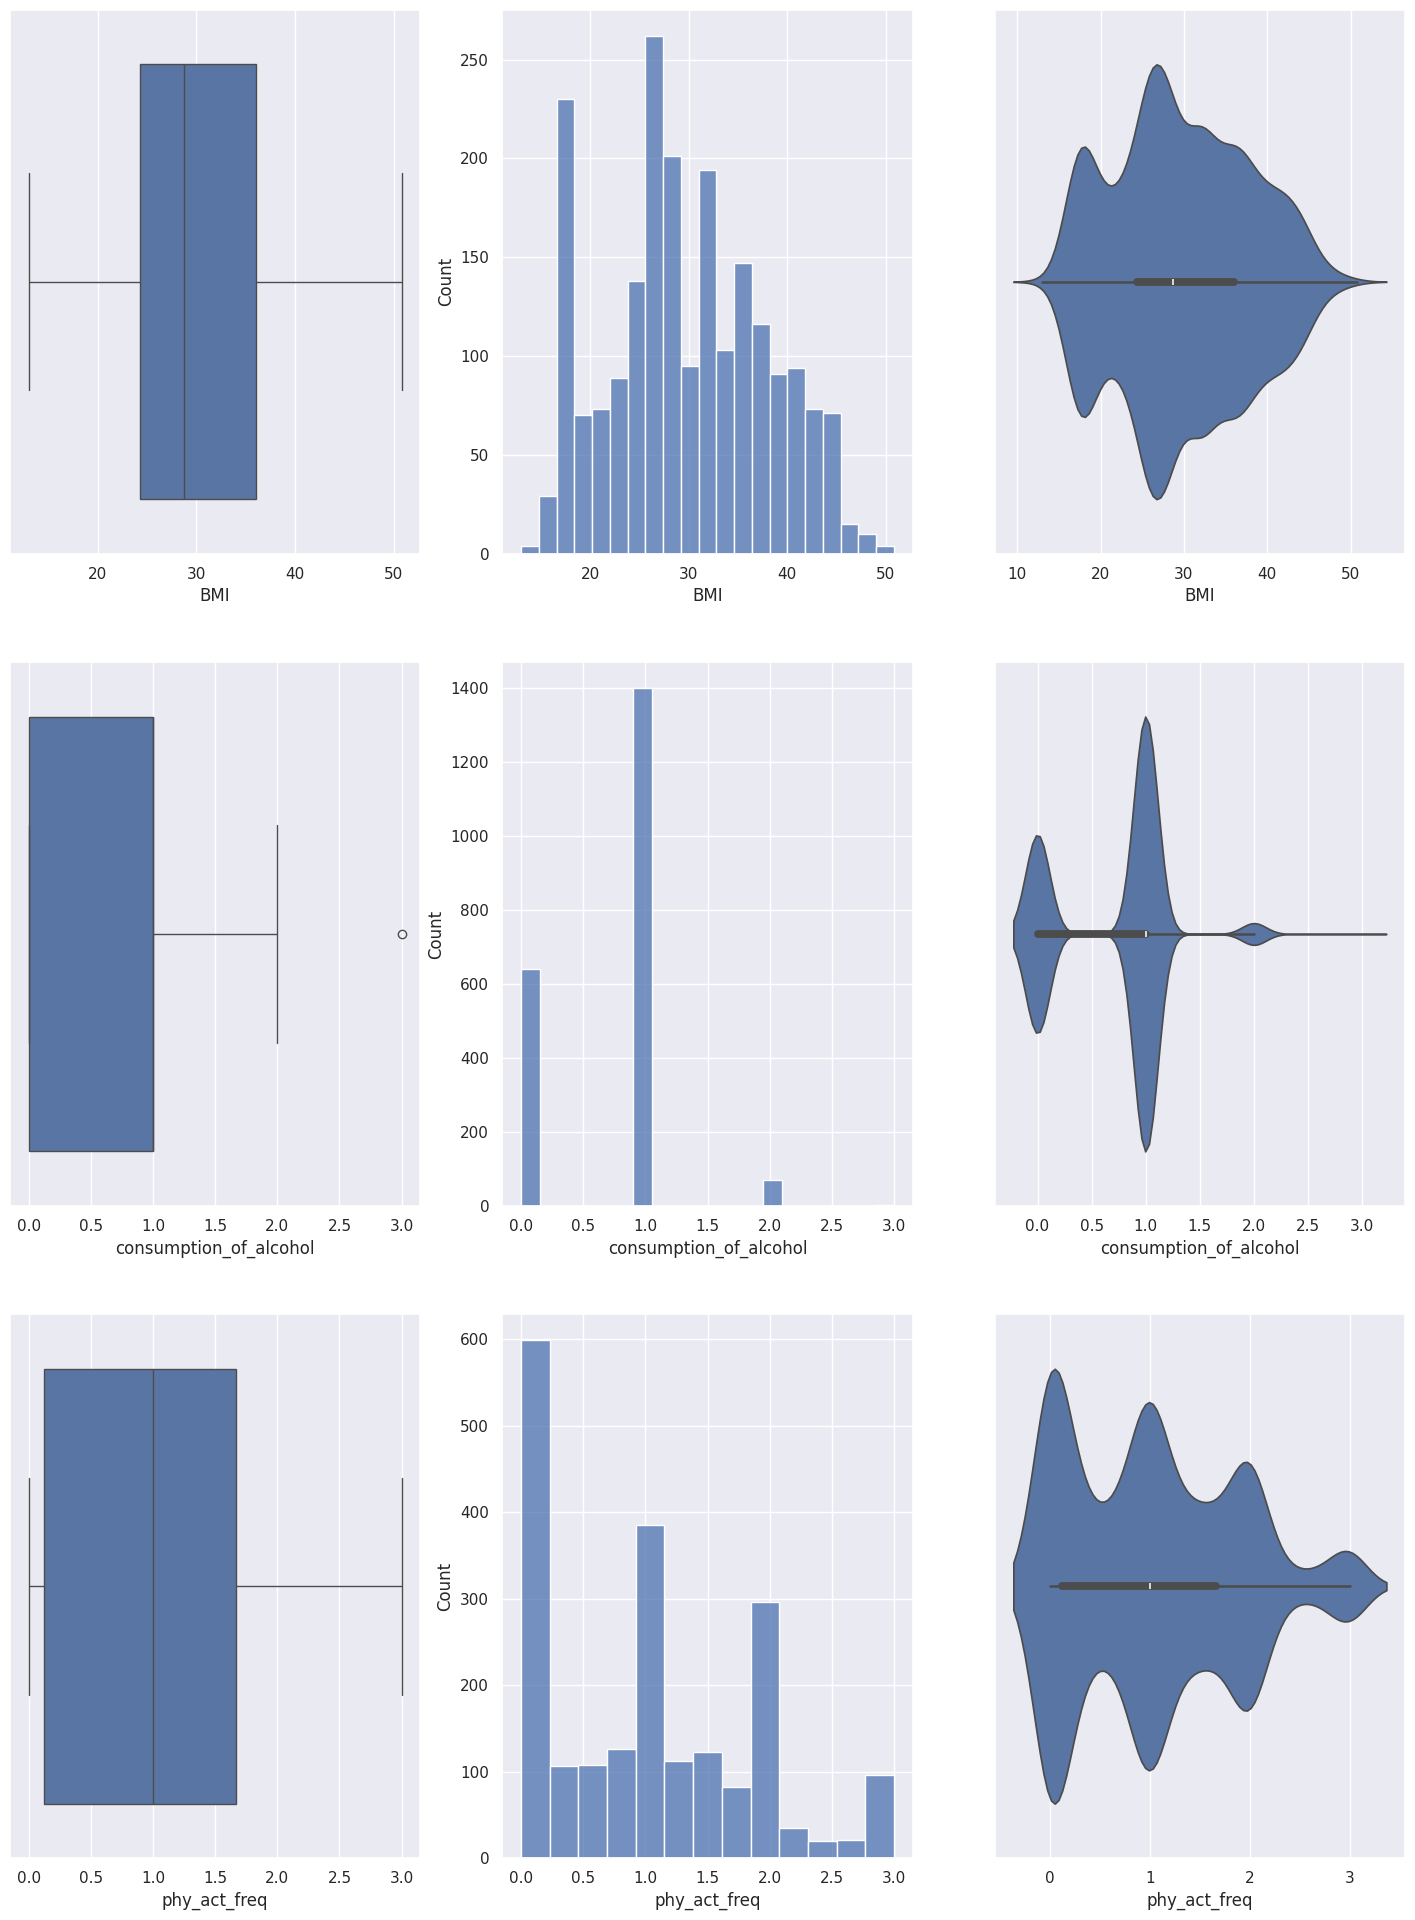

In [ ]:
#Draw the distributions of these variables
f, axes = plt.subplots (3,3, figsize =(18,24))
count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

                             BMI  consumption_of_alcohol  phy_act_freq
BMI                     1.000000                0.169397     -0.179217
consumption_of_alcohol  0.169397                1.000000     -0.087122
phy_act_freq           -0.179217               -0.087122      1.000000


<Axes: >

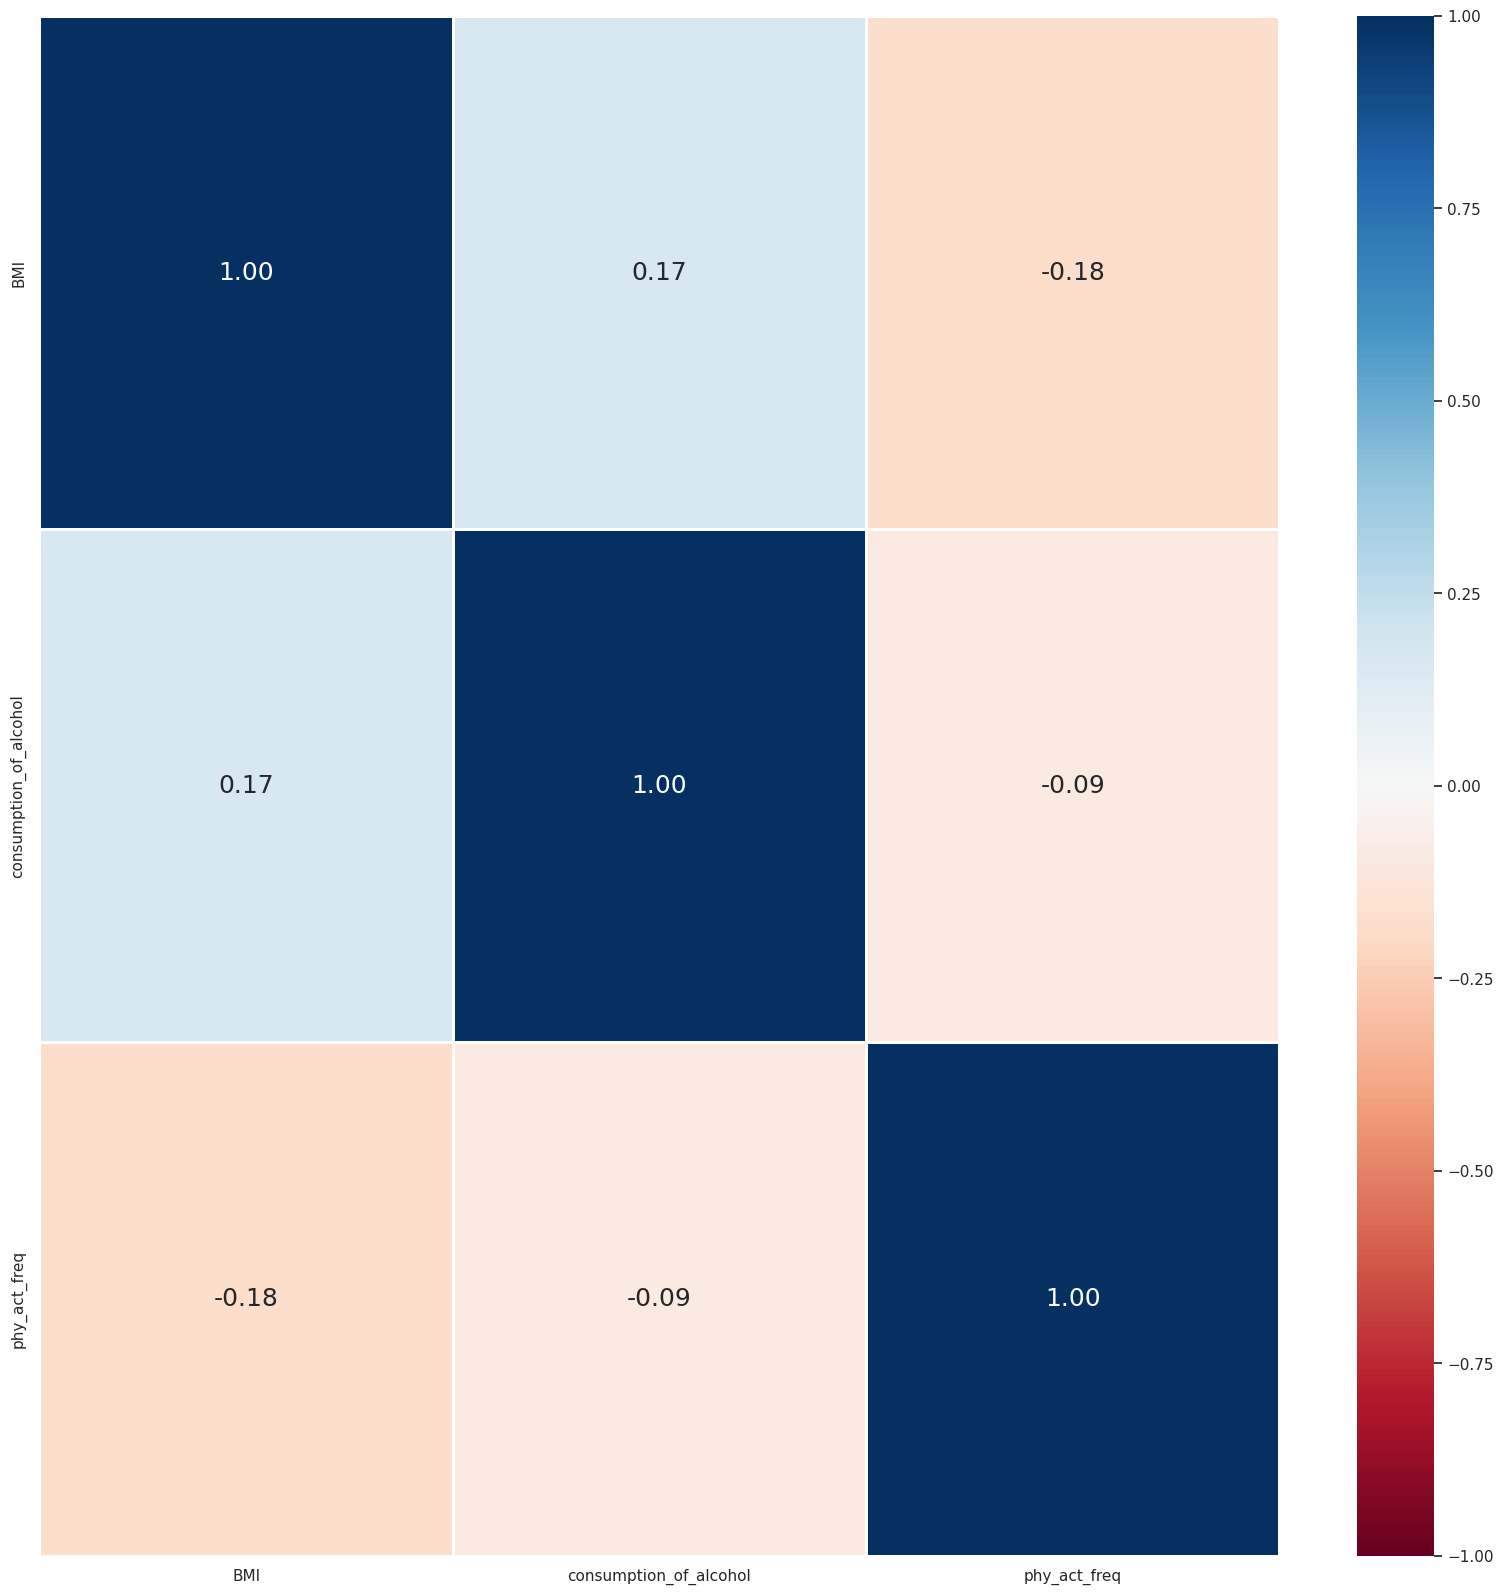

In [ ]:
# Correlation Matrix
print (numeric_data.corr())

#Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Observations**:  
- Low positive correlation of 0.17 between BMI and consumption_of_alcohol.
- Low negative correlation of -0.18 between BMI and phy_act_freq.

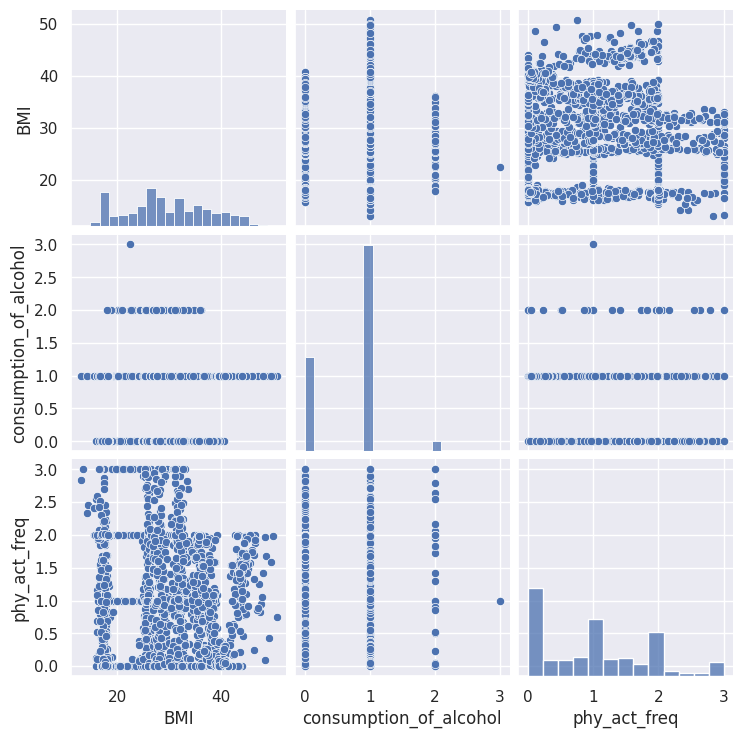

In [ ]:
#Draw pairs of variables against each other
sb.pairplot (data = numeric_data)

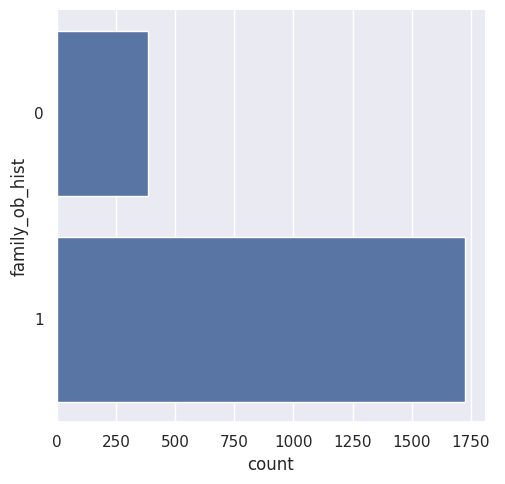

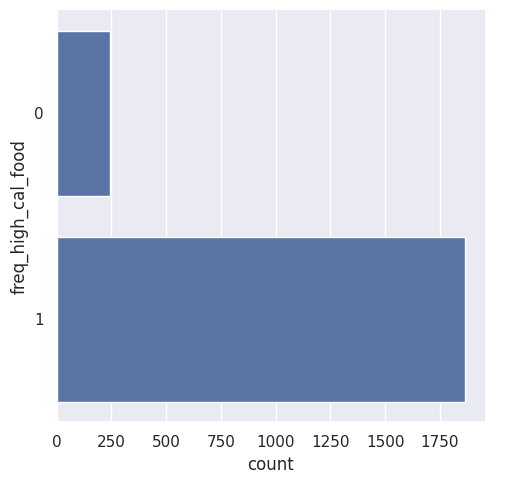

In [ ]:
#Analyze the categorical variables in the cleaned dataset
categorical_data = df_cleaned[["family_ob_hist","freq_high_cal_food"]]
for var in categorical_data:
    sb.catplot(y = var, data = categorical_data, kind = "count")

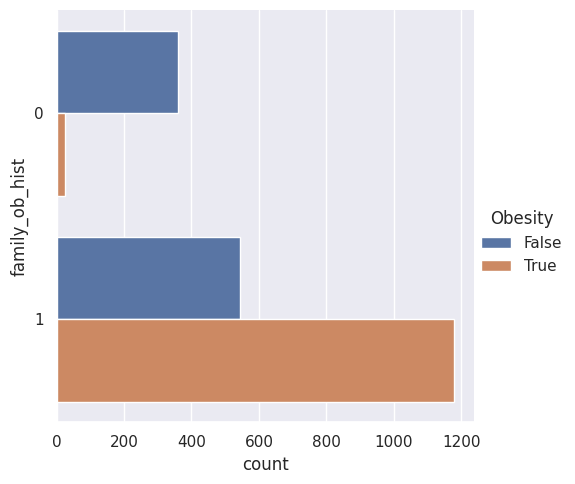

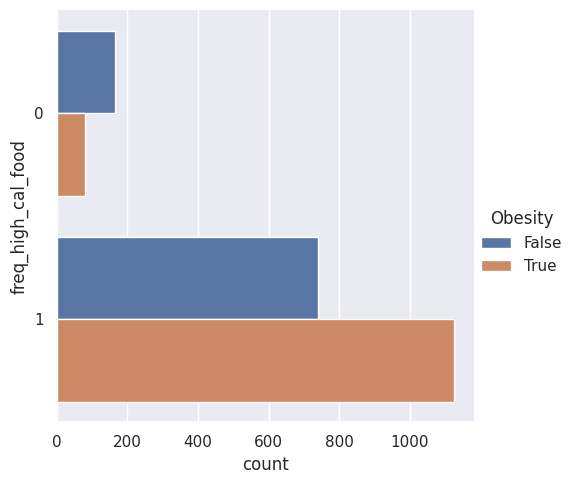

In [ ]:
#Analyze the relationship between categorical variables and obesity
for var in categorical_data:
    sb.catplot(y = var, data = df_cleaned, kind = "count", hue = "Obesity")

**Observations:**
- family_ob_hist may be a good predictor of obesity since there are significantly more obese people who come from family backgrounds with obese history compared to obese people who do not come from family backgrounds with obese history

- freq_high_cal_food may be a good predictor of obesity since there are significantly more obese people who frequently consumed high caloric food asd compared to reported numbers of obese people who do not consumer high caloric food

- We should investigate further via our models if these observations truly hold.

In [ ]:
#Obese people in the dataset
obese_data = df_cleaned[df_cleaned["Obesity"] == True]
print ("Number of obese people:",len(obese_data))


Number of obese people: 1204
